In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create .ddb file and populate with data

con = duckdb.connect(database="retail.ddb", read_only=False)

table = "us_retail_sales"

## vendas por mes, durante os anos

<Axes: xlabel='sales_month'>

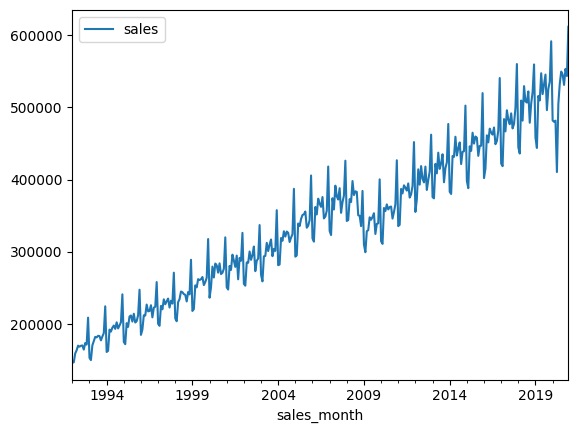

In [4]:
con.execute(
    f""" 
SELECT sales_month, sales
FROM '{table}'
where kind_of_business = 'Retail and food services sales, total'
order by 1
"""
).df().plot(x="sales_month", y="sales")

## soma de vendas por ano

<Axes: xlabel='year'>

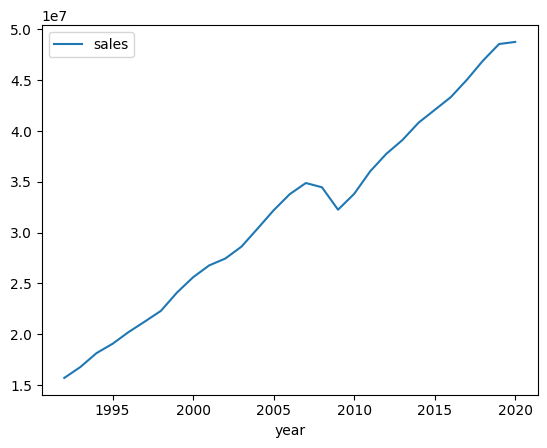

In [4]:
con.execute(
    f""" 
SELECT date_part('year', sales_month) as year, sum(sales) as sales 
FROM {table} 
group by 1
order by 1
"""
).df().plot(x="year", y="sales")

## comparando componentes

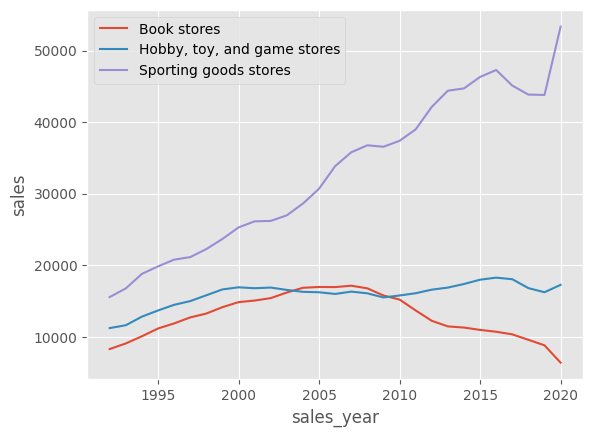

In [5]:
df_yearly_sales_mens_womens = con.execute(
    f""" 
SELECT date_part('year', sales_month) as sales_year, kind_of_business, sum(sales) as sales 
FROM {table} 
WHERE kind_of_business in ('Book stores', 'Sporting goods stores', 'Hobby, toy, and game stores')
group by 1,2
order by 1,2
"""
).df()#.plot(x='sales_year', y='sales', color='kind_of_business')#.pivot(index="sales_year", columns="kind_of_business", values="sales").plot()




plt.style.use('ggplot')
g = sns.lineplot(x='sales_year', y='sales', hue='kind_of_business', data=df_yearly_sales_mens_womens)
g.get_legend().set_title(None)

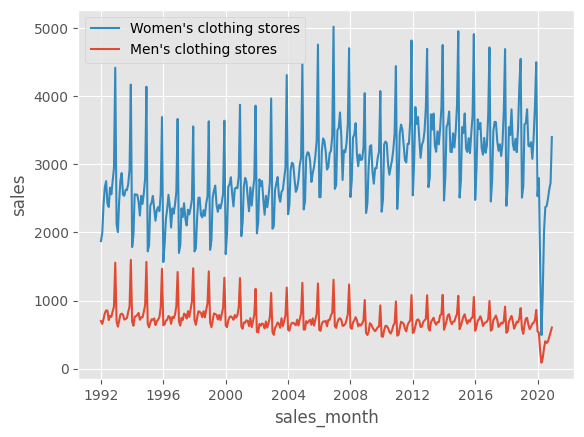

In [6]:
df_monthly_sales_mens_womens = con.execute(
    f""" 
SELECT sales_month, kind_of_business, sales 
FROM {table} 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2
"""
).df()#.pivot(index="sales_month", columns="kind_of_business", values="sales").plot()



sns.lineplot(x='sales_month', y='sales', hue='kind_of_business', data=df_monthly_sales_mens_womens).get_legend().set_title(None)

plt.legend(loc='upper left', reverse=True)

In [7]:
import matplotlib.pyplot as plt

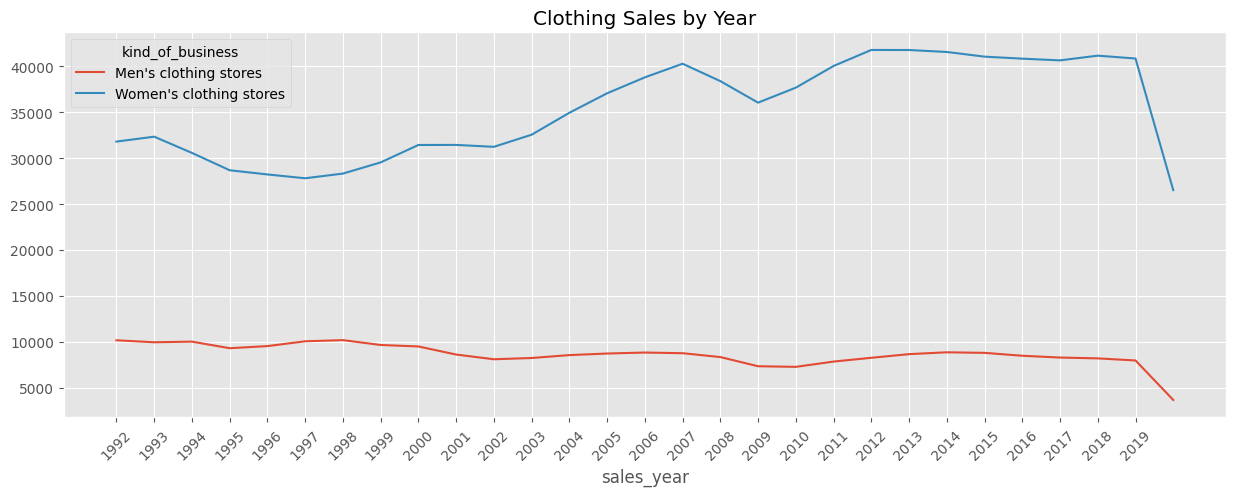

In [8]:
# plt.figure(figsize=(20,5))
con.execute(
    f""" 
SELECT date_part('year', sales_month) as sales_year, kind_of_business, sum(sales) as sales 
FROM {table} 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
group by 1,2
ORDER BY 1,2
"""
).df().pivot(index="sales_year", columns="kind_of_business", values="sales").plot(
    figsize=(15, 5)
)

plt.title("Clothing Sales by Year")

plt.xticks(rotation=90)

# x axis every year since 1992
plt.xticks(range(1992, 2020, 1))

plt.xticks(rotation=45)
plt.show()

In [9]:
con.execute(
    f""" 
SELECT date_part('year',sales_month) as sales_year
,sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales
,sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
FROM {table}
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
GROUP BY 1
ORDER BY 1
"""
).df()

,sales_year,womens_sales,mens_sales
0,1992,31815.0,10179.0
1,1993,32350.0,9962.0
2,1994,30585.0,10032.0
3,1995,28696.0,9315.0
4,1996,28238.0,9546.0
5,1997,27822.0,10069.0
6,1998,28332.0,10196.0
7,1999,29549.0,9667.0
8,2000,31447.0,9507.0
9,2001,31453.0,8625.0


<Axes: xlabel='sales_year'>

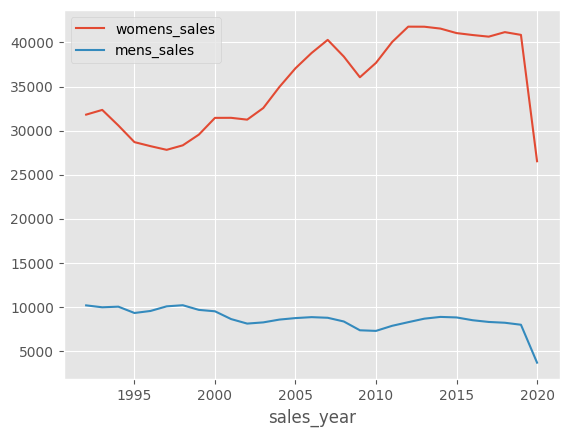

In [10]:
con.execute(
    f""" 
SELECT date_part('year', sales_month) as sales_year,
sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales,
sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
FROM {table} 
-- WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
group by 1
ORDER BY 1
"""
).df().plot(
    x="sales_year"
)  # .pivot(index='sales_year', columns='kind_of_business', values='sales')

In [11]:
con.execute(
    f""" 
with mens_womens_sales as(
    SELECT 
        date_part('year', sales_month) as sales_year,
        sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales,
        sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
    FROM {table} 
    -- WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
    group by 1
    ORDER BY 1
)

SELECT sales_year
,womens_sales - mens_sales as womens_minus_mens
,mens_sales - womens_sales as mens_minus_womens
from mens_womens_sales
order by 1

"""
).df().head()

,sales_year,womens_minus_mens,mens_minus_womens
0,1992,21636.0,-21636.0
1,1993,22388.0,-22388.0
2,1994,20553.0,-20553.0
3,1995,19381.0,-19381.0
4,1996,18692.0,-18692.0


<Axes: xlabel='sales_year'>

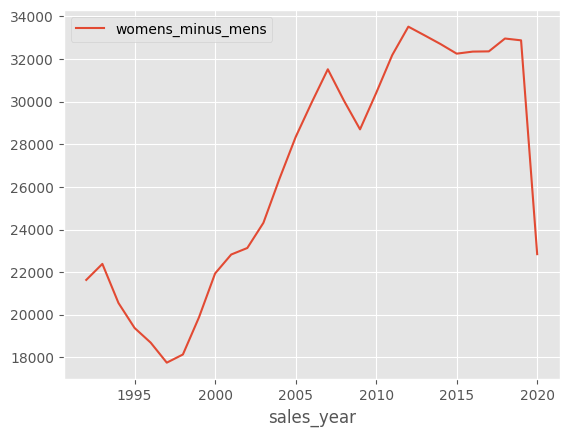

In [12]:
con.execute(
    f""" 
SELECT 
        date_part('year', sales_month) as sales_year,
        sum(case when kind_of_business = 'Women''s clothing stores' then sales end) 
            - sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as womens_minus_mens,
    FROM {table} 
    WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
    group by 1
    ORDER BY 1
"""
).df().set_index("sales_year").plot()

<Axes: title={'center': 'Yearly Ratio of Womens to mens retail cloothing store'}, xlabel='sales_year'>

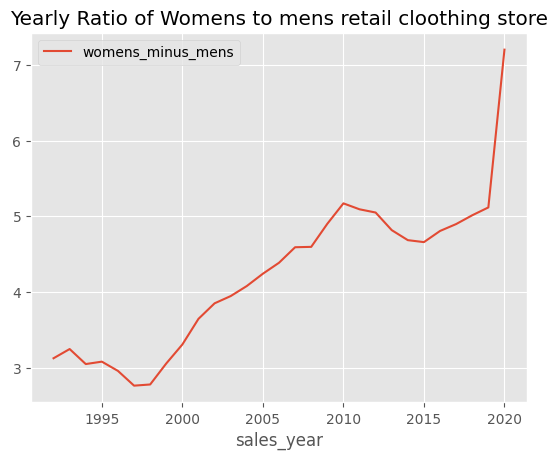

In [13]:
con.execute(
    f""" 
SELECT 
        date_part('year', sales_month) as sales_year,
        sum(case when kind_of_business = 'Women''s clothing stores' then sales end) 
            / sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as womens_minus_mens,
    FROM {table} 
    WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
    group by 1
    ORDER BY 1
"""
).df().set_index("sales_year").plot(
    title="Yearly Ratio of Womens to mens retail cloothing store"
)

<Axes: title={'center': 'Yearly Ratio of Womens to mens retail cloothing store'}, xlabel='sales_year'>

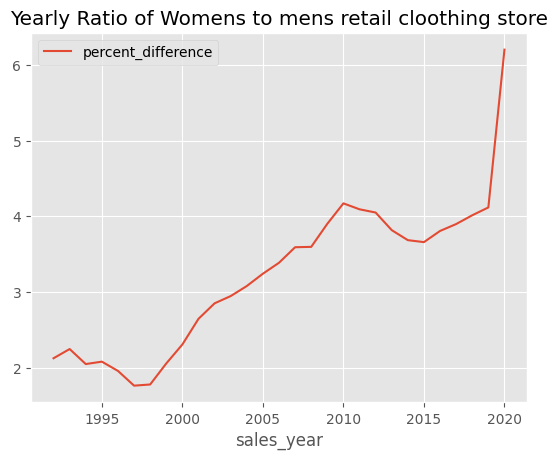

In [14]:
con.execute(
    f""" 
SELECT 
        date_part('year', sales_month) as sales_year,
        (sum(case when kind_of_business = 'Women''s clothing stores' then sales end) 
            - sum(case when kind_of_business = 'Men''s clothing stores' then sales end)) 
            / sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as percent_difference ,
    FROM {table} 
    WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
    group by 1
    ORDER BY 1
"""
).df().set_index("sales_year").plot(
    title="Yearly Ratio of Womens to mens retail cloothing store"
)

In [15]:
con.execute(
    f""" 
with mens_womens_sales as(
    SELECT 
        date_part('year', sales_month) as sales_year,
        sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales,
        sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
    FROM {table} 
    -- WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
    group by 1
    ORDER BY 1
)

select sales_year
,(womens_sales / mens_sales - 1) * 100 as percent_difference
from mens_womens_sales

"""
).df()

,sales_year,percent_difference
0,1992,212.555261
1,1993,224.733989
2,1994,204.874402
3,1995,208.062265
4,1996,195.809763
5,1997,176.313437
6,1998,177.873676
7,1999,205.668770
8,2000,230.777322
9,2001,264.672464


## percentual do total

In [16]:
con.execute(
    f""" 
SELECT 
sales_month,
kind_of_business,
sales,
sum(sales) over(partition by sales_month) as total_sales,
sales * 100 / sum(sales) over(partition by sales_month) as percent_of_total
FROM {table} 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
"""
).df()

,sales_month,kind_of_business,sales,total_sales,percent_of_total
0,1992-06-01,Men's clothing stores,853.0,3277.0,26.029905
1,1992-06-01,Women's clothing stores,2424.0,3277.0,73.970095
2,1992-12-01,Men's clothing stores,1557.0,5973.0,26.067303
3,1992-12-01,Women's clothing stores,4416.0,5973.0,73.932697
4,1993-04-01,Men's clothing stores,796.0,3558.0,22.372119
...,...,...,...,...,...
691,2015-08-01,Women's clothing stores,3383.0,4096.0,82.592773
692,2018-01-01,Men's clothing stores,528.0,2919.0,18.088386
693,2018-01-01,Women's clothing stores,2391.0,2919.0,81.911614
694,2020-02-01,Men's clothing stores,527.0,3324.0,15.854392


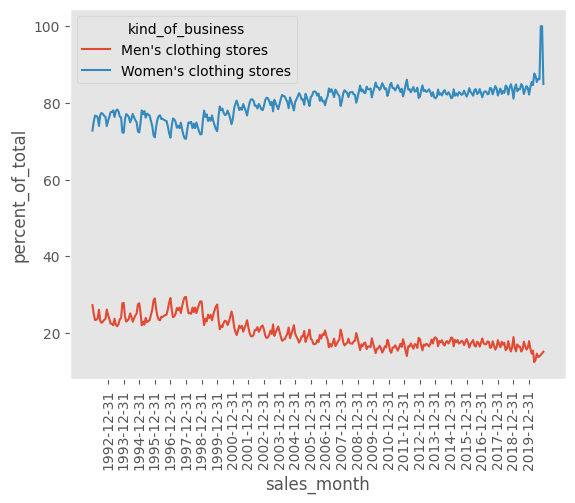

In [17]:
sns.lineplot(
    data=con.execute(
        f""" 
SELECT 
sales_month,
kind_of_business,
sales,
sum(sales) over(partition by sales_month) as total_sales,
sales * 100 / sum(sales) over(partition by sales_month) as percent_of_total
FROM {table} 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
"""
    ).df(),
    x="sales_month",
    y="percent_of_total",
    hue="kind_of_business",
)


datetime_range = pd.date_range(start="1992-01-01", end="2020-01-01", freq="y")

plt.xticks(datetime_range, rotation=90)

plt.grid()

In [18]:
yearly_pct = (
    con.execute(
        f""" 
SELECT sales_month, kind_of_business, 
sales,
sum(sales) over(partition by date_part('year', sales_month), kind_of_business) as yearly_sales,
sales * 100 / sum(sales) over(partition by date_part('year', sales_month), kind_of_business) as percent_of_yearly_total
FROM {table} 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
order by sales_month, kind_of_business
"""
    )
    .df()
    .query('sales_month >= "2019-01-01" and sales_month < "2020-01-01"')
)

<Axes: xlabel='sales_month', ylabel='percent_of_yearly_total'>

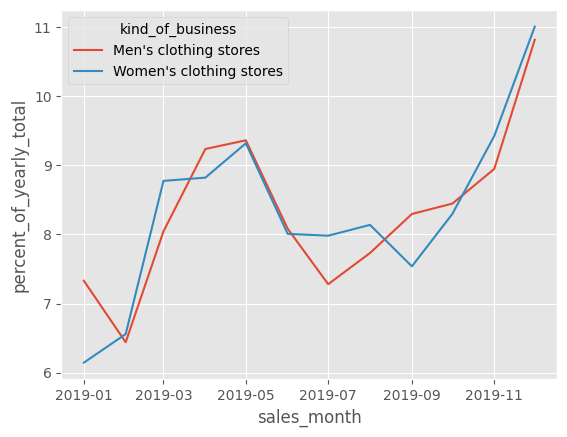

In [19]:
sns.lineplot(
    data=yearly_pct,
    x="sales_month",
    y="percent_of_yearly_total",
    hue="kind_of_business",
)

## Idexing to see percent change over time

In [20]:
df_index_sales = con.execute(
    f""" 
with yearly_sales as (
    select date_part('year', sales_month) as sales_year,
    sum(sales) as sales
    from {table}
    WHERE kind_of_business in ('Women''s clothing stores')
    group by 1
),
index_sales as (
SELECT sales_year, sales, first_value(sales) over(order by sales_year asc) as index_sales
FROM yearly_sales
)


select sales_year, sales, (sales / index_sales - 1) * 100 as pct_from_index
from index_sales

"""
).df()

In [21]:
df_index_sales.head()

,sales_year,sales,pct_from_index
0,1992,31815.0,0.000000
1,1993,32350.0,1.681597
2,1994,30585.0,-3.866101
3,1995,28696.0,-9.803552
4,1996,28238.0,-11.243124


<Axes: xlabel='sales_year', ylabel='pct_from_index'>

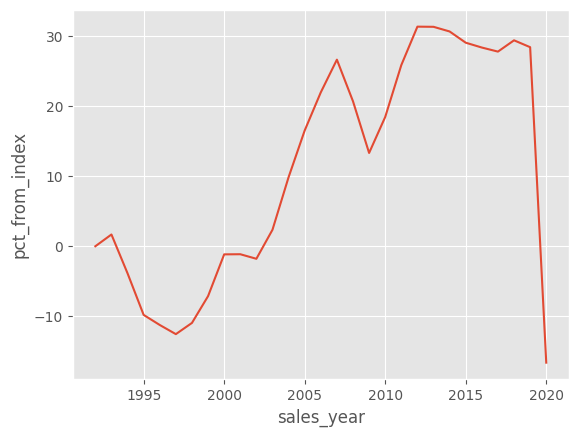

In [22]:
sns.lineplot(data=df_index_sales, x="sales_year", y="pct_from_index")

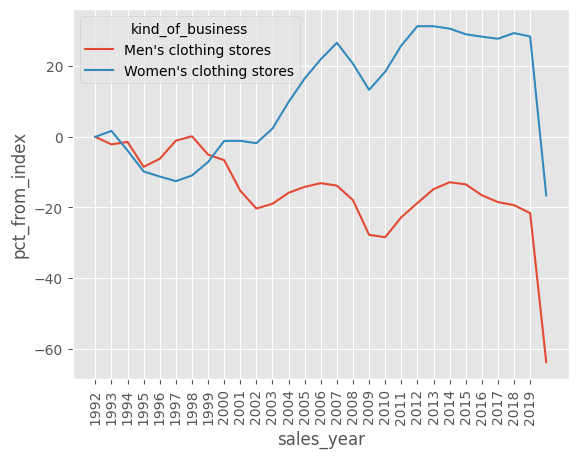

In [23]:
# men and women


df_yearly_index_gender = con.execute(f""" 
with yearly_sales_gender as (
SELECT date_part('year', sales_month) as sales_year
, kind_of_business
, sum(sales) as sales 
FROM {table}
where kind_of_business in ('Men''s clothing stores', 'Women''s clothing stores')
group by 1,2
)

select sales_year
, kind_of_business
, sales
, (sales / first_value(sales) over(partition by kind_of_business order by sales_year asc) - 1) * 100 as pct_from_index
from yearly_sales_gender

""").df()


sns.lineplot(x='sales_year', y='pct_from_index', hue='kind_of_business', data=df_yearly_index_gender)

plt.xticks(range(1992, 2020, 1), rotation=90);

## Rolling time windows

In [24]:
df_moving_avg = con.execute(
    """ 
    SELECT
        sales_month, 
        sales,
        avg(sales) over(order by sales_month rows between 11 preceding and current row) as moving_avg,
        count(sales) over(order by sales_month rows between 11 preceding and current row) as records_count
    FROM us_retail_sales
    where 
        kind_of_business = 'Women''s clothing stores'
    """
).df()

df_moving_avg.head()

,sales_month,sales,moving_avg,records_count
0,1992-01-01,1873,1873.0,1
1,1992-02-01,1991,1932.0,2
2,1992-03-01,2403,2089.0,3
3,1992-04-01,2665,2233.0,4
4,1992-05-01,2752,2336.8,5


Text(0, 0.5, 'Sales (Millions)')

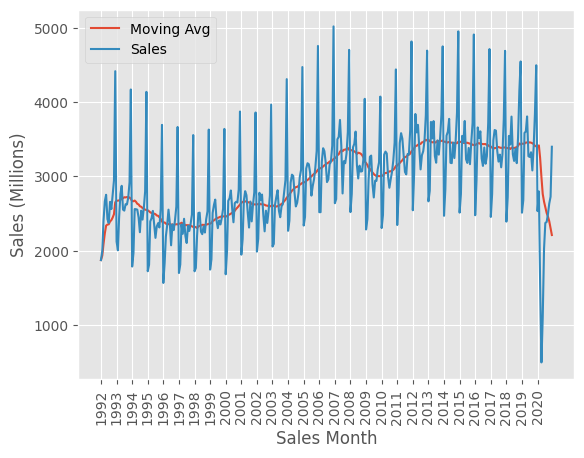

In [25]:
sns.lineplot(x="sales_month", y="moving_avg", data=df_moving_avg, label="Moving Avg")
sns.lineplot(x="sales_month", y="sales", data=df_moving_avg, label="Sales")

# xticks 90 degree rotation, and year by year
plt.xticks(rotation=90)
plt.xticks(df_moving_avg.sales_month[::12], df_moving_avg.sales_month[::12].dt.year)

plt.legend()
plt.xlabel("Sales Month")
plt.ylabel("Sales (Millions)")

In [26]:
df_ytd = con.execute(
    """ SELECT 
                date_part('year', sales_month) as year,
                kind_of_business,
                sales_month,
                sales,
                sum(sales) over(partition by year, kind_of_business order by sales_month ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as sales_ytd
            FROM us_retail_sales
            where kind_of_business in ('Women''s clothing stores', 'Men''s clothing stores')
            order by sales_month
            """
).df()

df_ytd.head()

,year,kind_of_business,sales_month,sales,sales_ytd
0,1992,Women's clothing stores,1992-01-01,1873.0,1873.0
1,1992,Men's clothing stores,1992-01-01,701.0,701.0
2,1992,Women's clothing stores,1992-02-01,1991.0,3864.0
3,1992,Men's clothing stores,1992-02-01,658.0,1359.0
4,1992,Women's clothing stores,1992-03-01,2403.0,6267.0


<Axes: xlabel='year', ylabel='sales_ytd'>

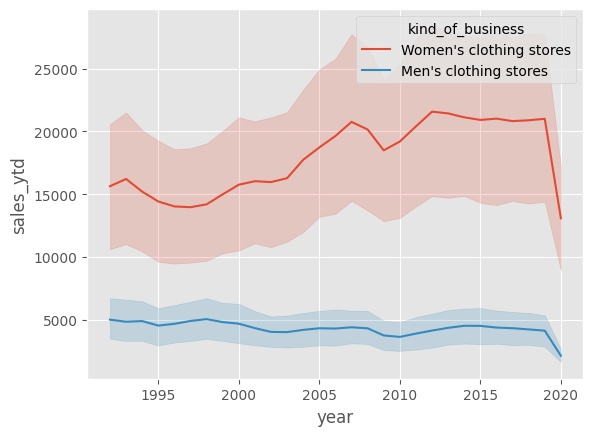

In [27]:
sns.lineplot(x='year', y='sales_ytd', hue='kind_of_business', data=df_ytd)

### rolling time windows with sparse dataset

In [28]:
con.execute(f"""  
drop table date_dim

""").df()

,Success


In [29]:
con.execute(f""" 
CREATE TABLE date_dim (
    date_id INT PRIMARY KEY NOT NULL UNIQUE,
    date DATE,
    year INT,
    quarter INT,
    month INT,
    day INT,
    day_of_week INT,
);

""").df()

,Count


In [30]:
con.execute(f""" 
CREATE SEQUENCE date_id_sq START 1;
-- Recursive CTE to populate the date_dim table with data
WITH RECURSIVE date_series AS (
    SELECT '1991-01-01'::DATE AS date
    UNION ALL
    SELECT date + 1
    FROM date_series
    WHERE date + 1 <= '2023-12-31'::DATE
)
INSERT INTO date_dim (date_id, date, year, quarter, month, day, day_of_week)
SELECT
nextval('date_id_sq') AS date_id,
date,
date_part('year', date) AS year,
date_part('quarter', date) AS quarter,
date_part('month', date) AS month,
date_part('day', date) AS day,
date_part('dayofweek', date) AS day_of_week,
FROM
date_series;
""").df()

CatalogException: Catalog Error: Sequence with name "date_id_sq" already exists!

In [ ]:
con.execute(f"""
with sparse_data as (
SELECT sales_month, sales
FROM {table} 
WHERE kind_of_business = 'Women''s clothing stores' 
and date_part('month',sales_month) in (1,7) 
order by sales_month
),
first_day as (
    select *, 
    case when day = 1 then 1 else 0 end as first_day_of_month
    from date_dim
)

select a.date, 
avg(b.sales) as moving_avg
from first_day a
join sparse_data b on b.sales_month between a.date - interval '11 months' and a.date
where a.day = 1 and a.date between '1992-01-01' and '2020-12-31'
group by 1

""").df()

,date,moving_avg
0,1992-01-01,1873.0
1,1992-02-01,1873.0
2,1992-03-01,1873.0
3,1992-04-01,1873.0
4,1992-05-01,1873.0
...,...,...
343,2009-04-01,2628.5
344,2009-07-01,2500.5
345,2011-05-01,2596.0
346,2015-04-01,2845.0


In [ ]:
# sem date_dim

con.execute(f""" 
SELECT a.sales_month
,avg(b.sales) as moving_avg
FROM
(
        SELECT distinct sales_month
        FROM us_retail_sales
        WHERE sales_month between '1993-01-01' and '2020-12-01'
) a
JOIN us_retail_sales b on b.sales_month between a.sales_month - interval '11 months' and a.sales_month
and b.kind_of_business = 'Women''s clothing stores' 
GROUP BY 1
order by 1
;

""").df()

,sales_month,moving_avg
0,1993-01-01,2672.083333
1,1993-02-01,2673.250000
2,1993-03-01,2676.500000
3,1993-04-01,2684.583333
4,1993-05-01,2694.666667
...,...,...
331,2020-08-01,2507.416667
332,2020-09-01,2458.583333
333,2020-10-01,2395.583333
334,2020-11-01,2301.916667


## calculating cumulative values

In [ ]:
con.execute(f""" 
SELECT date_part('year', sales_month) as sales_year,
sales_month
, sales,
sum(sales) over(partition by date_part('year', sales_month) order by sales_month) as sales_ytd
FROM {table} 
where kind_of_business in ('Women''s clothing stores')


""").df()#.plot(x='sales_year', y='sales_ytd')

,sales_year,sales_month,sales,sales_ytd
0,1997,1997-01-01,1699,1699.0
1,1997,1997-02-01,1813,3512.0
2,1997,1997-03-01,2353,5865.0
3,1997,1997-04-01,2227,8092.0
4,1997,1997-05-01,2429,10521.0
...,...,...,...,...
343,2019,2019-08-01,3325,26045.0
344,2019,2019-09-01,3080,29125.0
345,2019,2019-10-01,3390,32515.0
346,2019,2019-11-01,3850,36365.0


# period-over-period comparisons: YoY and MoM

In [ ]:
# MoM
con.execute(f"""
with month_over_month as (
SELECT kind_of_business, sales_month, sales,
lag(sales_month) over(partition by kind_of_business order by sales_month) as prev_month,
lag(sales) over(partition by kind_of_business order by sales_month) as prev_month_sales
FROM {table} 
where kind_of_business in ('Book stores')
)


select kind_of_business,
sales_month, 
sales,
(sales / prev_month_sales - 1) * 100 as pct_change_from_prev_month
from month_over_month
""").df()

,kind_of_business,sales_month,sales,pct_change_from_prev_month
0,Book stores,1992-01-01,790,NaN
1,Book stores,1992-02-01,539,-31.772152
2,Book stores,1992-03-01,535,-0.742115
3,Book stores,1992-04-01,523,-2.242991
4,Book stores,1992-05-01,552,5.544933
...,...,...,...,...
343,Book stores,2020-08-01,770,76.201373
344,Book stores,2020-09-01,620,-19.480519
345,Book stores,2020-10-01,455,-26.612903
346,Book stores,2020-11-01,496,9.010989


In [ ]:
# YoY
con.execute(f"""

with yearly_sales as(
    
    select date_part('year', sales_month) as sales_year,
    sum(sales) as sales_sum
    from {table}
    where kind_of_business in ('Book stores')
    group by 1
),
year_over_year as (
SELECT sales_year, sales_sum
, lag(sales_year) over(order by sales_year) as prev_year,
lag(sales_sum) over(order by sales_year) as prev_year_sales
FROM yearly_sales
)

select sales_year,
(sales_sum / prev_year_sales -1 ) *100 as pct_change_from_prev_year
from year_over_year
""").df()

,sales_year,pct_change_from_prev_year
0,1992,NaN
1,1993,9.379128
2,1994,10.968379
3,1995,10.774711
4,1996,6.332619
5,1997,7.030659
6,1998,4.237953
7,1999,6.700798
8,2000,4.988710
9,2001,1.471873


In [40]:
# same period last year

con.execute(f"""
SELECT sales_month, 
date_part('month', sales_month) as month,
(sales / lag(sales) over(partition by date_part('month', sales_month) order by sales_month) - 1) * 100 as pct_diff 
FROM {table}
where kind_of_business in ('Book stores')
order by 2
""").df()

,sales_month,month,pct_diff
0,1992-01-01,1,NaN
1,1993-01-01,1,26.329114
2,1994-01-01,1,5.511022
3,1995-01-01,1,24.216524
4,1996-01-01,1,4.969419
...,...,...,...
343,2016-12-01,12,-5.450416
344,2017-12-01,12,-10.808647
345,2018-12-01,12,0.718133
346,2019-12-01,12,-7.575758


In [45]:
# same day last week

# SELECT SUM(sales) AS sales_last_week
# FROM sales_table
# WHERE date = DATE_SUB(CURDATE(), INTERVAL 1 WEEK);


con.execute(f"""
SELECT saleS_month,
sales_month -  interval '1 week' as sales_month_last_week,
date_part('dow', sales_month) as day_of_week,
date_part('dow', sales_month -  interval '1 week') as day_of_week_last_week,
FROM {table}
where kind_of_business in ('Book stores')
""").df()

,sales_month,sales_month_last_week,day_of_week,day_of_week_last_week
0,1992-01-01,1991-12-25,3,3
1,1992-02-01,1992-01-25,6,6
2,1992-03-01,1992-02-23,0,0
3,1992-04-01,1992-03-25,3,3
4,1992-05-01,1992-04-24,5,5
...,...,...,...,...
343,2020-08-01,2020-07-25,6,6
344,2020-09-01,2020-08-25,2,2
345,2020-10-01,2020-09-24,4,4
346,2020-11-01,2020-10-25,0,0


<Axes: xlabel='sales_month'>

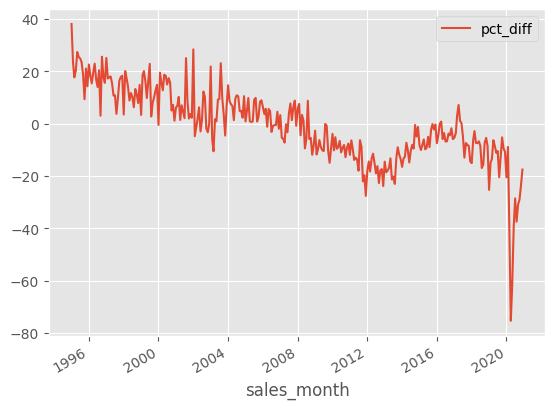

In [57]:
# comparing to multiple prior periods



con.execute(f"""
with month_previous_3_months as (
SELECT 
sales_month,
sales,
lag(sales, 1) over(partition by date_part('month', sales_month) order by sales_month) as sales_1_month_prior,
lag(sales, 2) over(partition by date_part('month', sales_month) order by sales_month) as sales_2_month_prior,
lag(sales, 3) over(partition by date_part('month', sales_month) order by sales_month) as sales_3_month_prior
FROM {table} 
where kind_of_business  = 'Book stores'
)


select 
sales_month, 
sales,
(sales  / ((sales_1_month_prior + sales_2_month_prior + sales_3_month_prior) / 3 ) -1)*100 as pct_diff
from month_previous_3_months


""").df().plot(x='sales_month', y='pct_diff')

<Axes: xlabel='sales_month'>

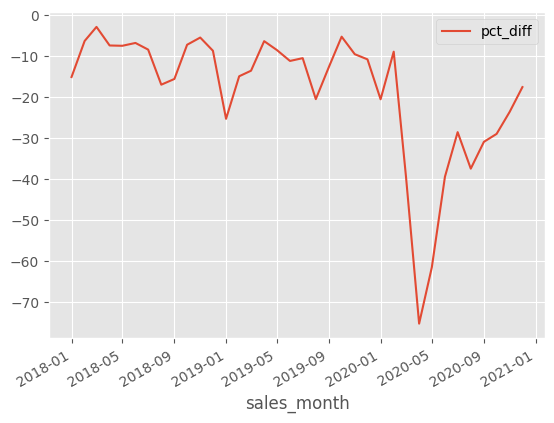

In [64]:
# using window function's offset


con.execute(f""" 
            
select *
from
(SELECT sales_month,
sales,
(sales  / avg(sales) over(partition by date_part('month', sales_month) order by sales_month rows between 3 preceding and 1 preceding) - 1) * 100 as pct_diff 
FROM {table} 
where kind_of_business  = 'Book stores')
where sales_month >= '2018-01-01'

""").df().plot(x='sales_month', y='pct_diff')